**Nombre:** Dayana Andrea Henao Arbeláez

**Cédula:** 1001469185

Los siguientes datos fueron extraidos de los datos para la cuarta ola de infecciones por millon de  habitantes (IPMH) de Colombia por la variante Omicrón del Coronavirus

A) Genere un data frame de pandas y agregé una nueva columna de IPMH con una incertidubre del 2 por mil aleatoria. Es decir, a cada IPMH sumarle o restarle un número aleatoria en el rango de su 2 por mil

B) Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine (para la columna con incertidumbre)
1. La velocidad inicial de IPMH  en `IPMH/día`
1. La aceleración constante en `IPMH/día**2`
1. El número máximo de IPMH que se alcanzaría
1. El número de días en el que se alcanzaría dicho máximo
1. Realice una gráfico que muestré el ajuste y la posición del máximo usando los estándares adecuados

DATOS
```python  
[
    {'día':1,'IPMH':464},
    {'día':2,'IPMH':494},
    {'día':3,'IPMH':532},
    {'día':4,'IPMH':552},
    {'día':5,'IPMH':576},
    {'día':6,'IPMH':589}
]
```

# Primer punto

In [191]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt

In [192]:
df=pd.DataFrame({'día':[1,2,3,4,5,6], 'IPMH':[464,494,532,552,576,589]})

In [193]:
# Dataframe con los datos de los días y el IPMH 
df

,día,IPMH
0,1,464
1,2,494
2,3,532
3,4,552
4,5,576
5,6,589


In [194]:
np.random.seed(1) # Pone una semilla para que los números aleatorios sean los mismos cada vez que se corra el código
inc=[] 
for i in df.IPMH: 
  inc.append(np.random.uniform(-0.002*i,0.002*i)) # Genera un número aleatorio entre el rango de incertidumbre de cada valor y lo agrega a una lista.  

In [195]:
# Lista de las incertidumbres
inc


[-0.1540071592720227,
 0.43536119904170434,
 -1.0637566103886902,
 -0.4364496796288978,
 -0.8138744275573717,
 -0.9604502707247123]

In [196]:
# Lista de los IPMH
IPMH=[464,494,532,552,576,589]

In [197]:
# Para calcular la incertidumbre que se va a poner en el DataFrame, sumo las listas anteriores. 
incertidumbre = []

for i, w in enumerate(inc):
    incertidumbre.append(inc[i] + IPMH[i])

print(incertidumbre)

[463.845992840728, 494.4353611990417, 530.9362433896113, 551.5635503203711, 575.1861255724426, 588.0395497292753]


*DataFrame con las incertidumbres del IPMH*

In [198]:
df['Incertidumbre']=incertidumbre
df

,día,IPMH,Incertidumbre
0,1,464,463.845993
1,2,494,494.435361
2,3,532,530.936243
3,4,552,551.563550
4,5,576,575.186126
5,6,589,588.039550


# Segundo punto

In [199]:
# Defino los datos que voy a utilizar
T=df.día
y=df.Incertidumbre

In [200]:
# Genera los coeficientes del polinomio que me ajusta los datos
coeficientes=np.polyfit(T,y, deg=2)

In [201]:
# Polinomio que me ajusta los datos
P=np.poly1d(coeficientes, variable='t')
print(P)


        2
-2.503 t + 42.78 t + 422.3


El polinomio hallado anteriormente en analogía con una caída libre sería de posición, para encontrar la velocidad inicial, se deriva el polinomio y se evalúa en 0, y para hallar la aceleración el poliniomio se debe derivar 2 veces.

In [202]:
# Para calcular la velocidad
v=P.deriv()
v=np.poly1d(v.coef,variable='t')
print(v)

 
-5.007 t + 42.78


In [203]:
# Velocidad inicial
v_0=v(0)
v_0

42.77690100928055

1) La velocidad inicial de IPMH es 42.8 IPMH/día

In [204]:
a=v.deriv()
print(a)

 
-5.007


2) La aceleración constante es -5 IPMH/día**2

Para hallar el número de días en el que se alcanza el número máximo de IPMH, se debe hallar el cero de la derivada del polinomio (optimización)

$ v= v0+at=0$

4) Número de días en el que se alcanza el IPMH máximo --- 8 Días

In [205]:
# Halla el cero de la función 
root=optimize.newton(v,1)
print(root)

8.543605358486055


3) El número máximo de IPMH que alcanza es 604 aproximadamente.

In [206]:
#IPBM máximo
P(root)

604.9853876068003

5) Gráfico

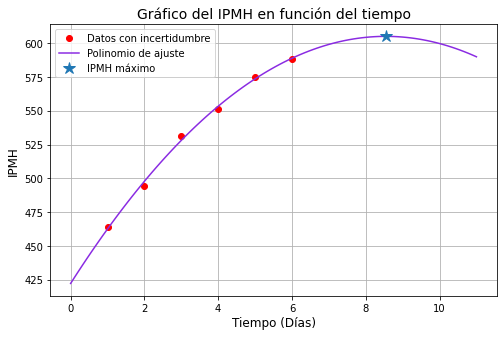

In [207]:
t=np.linspace(0,11,100)
plt.figure(figsize=(8,5))
plt.plot(T,y,'ro', label='Datos con incertidumbre')
plt.plot(t,P(t), label='Polinomio de ajuste', color='blueviolet')
plt.plot(root,P(root),'*',label='IPMH máximo', markersize=12)
plt.title('Gráfico del IPMH en función del tiempo', fontsize=14)
plt.xlabel('Tiempo (Días)', fontsize=12)
plt.ylabel('IPMH', fontsize=12)
plt.grid()
plt.legend()